In [2]:
import sys
from pathlib import Path

parent = str(Path().resolve().parent)
if parent not in sys.path:
    sys.path.insert(0, parent)

In [3]:
import ast
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
df_groups = pd.read_csv("../data/wip/groups_wMembers3.csv").drop_duplicates()
df_groups

,pageid,title,cleaned_member,disc_members,all_members
0,489818,A Friend in London,['Tim Schou'],"['Tim Schou', 'Esben Svane', 'Aske Damm Brammi...","['Aske Damm Bramming', 'Esben Svane', 'Sebasti..."
1,157530,Ache,"['Per Wium', 'Peter Mellin', 'Finn Olafsson', ...",[],"['Finn Olafsson', 'Per Wium', 'Peter Mellin', ..."
2,255559,ADS (band),"['Michael Funder Thorlasius', 'Stig Pedersen',...",[],"['Karsten Hjarsø', 'Lars Top-Galia', 'Martin K..."
3,976777,Agathorn,[],[],[]
4,493993,Alabama Black Snakes,"['Jonas Jessen', 'Hank Lee Tuffer', 'Mads Øste...",[],"['Gustav Pontoppidan', 'Hank Lee Tuffer', 'Jon..."
...,...,...,...,...,...
1029,37360,Odense Symfoniorkester,"['Bjarne Hansen', 'Ulrike Kipp', 'Michaela Fuk...",[],"['Alf Vestergaard', 'Anca Bold', 'Angelika Wag..."
1030,162784,Sjællands Symfoniorkester,"['Ole Böhn', 'Harry Gram-Jensen', 'Fritz O. Ja...",[],"['Fritz O. Jacobsen', 'Harry Gram-Jensen', 'Il..."
1031,10733,Sønderjyllands Symfoniorkester,"['Anne Augustinsson', 'Jesper Hindø', 'Nikolai...",[],"['Anne Augustinsson', 'Brian Quist Jørgensen',..."
1032,369172,Aalborg Symfoniorkester,"['Marius Ungureanu', 'Ib Dirkov', 'Moshe Atzmo...",[],"['Bettina Ejlerts Jensen', 'Bo Juel Christians..."


In [5]:
cleand_df_groups = df_groups[df_groups['all_members'].apply(len) > 2]
cleand_df_groups.loc[:, 'all_members'] = cleand_df_groups['all_members'].apply(ast.literal_eval)
cleand_df_groups

,pageid,title,cleaned_member,disc_members,all_members
0,489818,A Friend in London,['Tim Schou'],"['Tim Schou', 'Esben Svane', 'Aske Damm Brammi...","[Aske Damm Bramming, Esben Svane, Sebastian Vi..."
1,157530,Ache,"['Per Wium', 'Peter Mellin', 'Finn Olafsson', ...",[],"[Finn Olafsson, Per Wium, Peter Mellin, Steen ..."
2,255559,ADS (band),"['Michael Funder Thorlasius', 'Stig Pedersen',...",[],"[Karsten Hjarsø, Lars Top-Galia, Martin Krogh,..."
4,493993,Alabama Black Snakes,"['Jonas Jessen', 'Hank Lee Tuffer', 'Mads Øste...",[],"[Gustav Pontoppidan, Hank Lee Tuffer, Jonas Je..."
5,279528,The Alligators,"['Ole Ballund', 'Jens Dan', 'Niels Mathiasen',...",[],"[Jens Dan, Morten Kjeldsen, Niels Mathiasen, O..."
...,...,...,...,...,...
1029,37360,Odense Symfoniorkester,"['Bjarne Hansen', 'Ulrike Kipp', 'Michaela Fuk...",[],"[Alf Vestergaard, Anca Bold, Angelika Wagner, ..."
1030,162784,Sjællands Symfoniorkester,"['Ole Böhn', 'Harry Gram-Jensen', 'Fritz O. Ja...",[],"[Fritz O. Jacobsen, Harry Gram-Jensen, Ilse O...."
1031,10733,Sønderjyllands Symfoniorkester,"['Anne Augustinsson', 'Jesper Hindø', 'Nikolai...",[],"[Anne Augustinsson, Brian Quist Jørgensen, Hen..."
1032,369172,Aalborg Symfoniorkester,"['Marius Ungureanu', 'Ib Dirkov', 'Moshe Atzmo...",[],"[Bettina Ejlerts Jensen, Bo Juel Christiansen,..."


In [6]:
# 1157549
cleand_df_groups['all_members'][0]

['Aske Damm Bramming', 'Esben Svane', 'Sebastian Vinther Olsen', 'Tim Schou']

In [7]:
B = nx.Graph()
for _, row in cleand_df_groups.iterrows():
    band = row['title']
    B.add_node(band, bipartite='band')
    for musician in row['all_members']:
        B.add_node(musician, bipartite='musician')
        B.add_edge(band, musician)

In [8]:
bands = [n for n,d in B.nodes(data=True) if d['bipartite']=='band']
musicians = [n for n,d in B.nodes(data=True) if d['bipartite']=='musician']

In [9]:
pos = nx.spring_layout(B, seed=43, k=0.05)

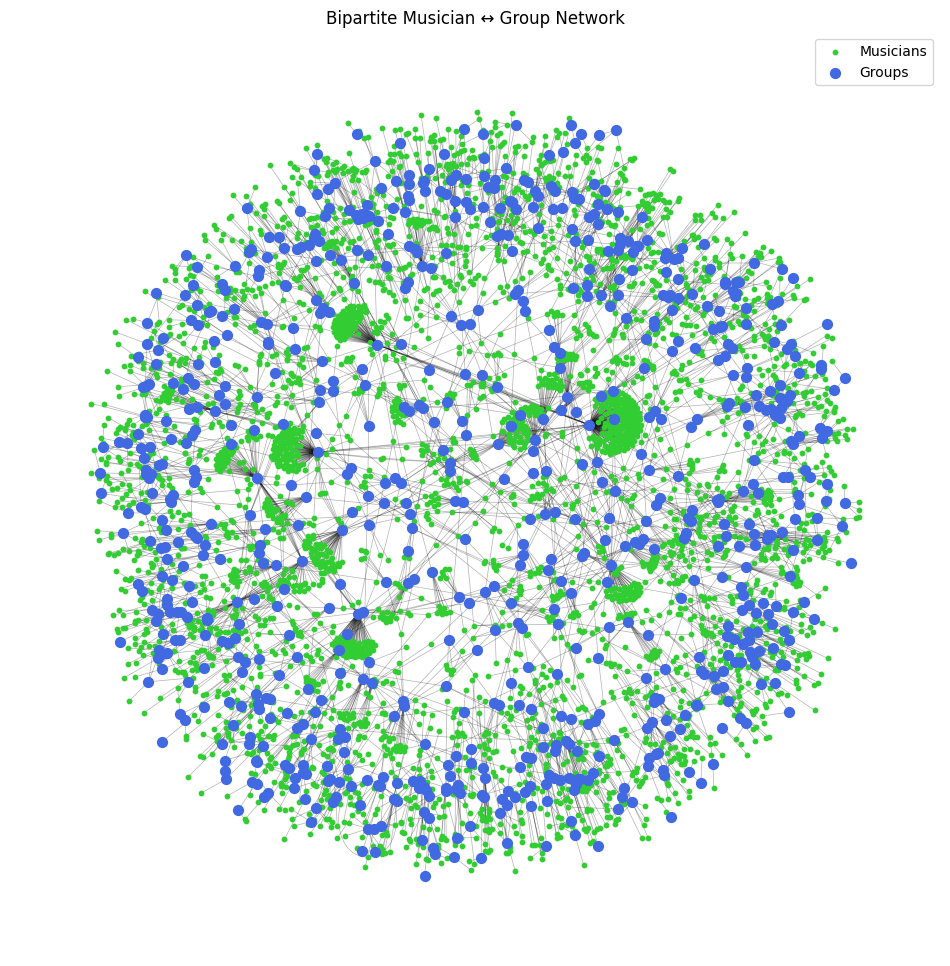

In [11]:
plt.figure(figsize=(12,12))

# Draw musician nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=musicians,
    node_color='limegreen',
    node_size=10,
    label='Musicians'
)

# Draw band nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=bands,
    node_color='royalblue',
    node_size=50,
    label='Groups'
)

# Draw edges
nx.draw_networkx_edges(B, pos, alpha=0.3, width=0.5)


plt.title("Bipartite Musician ↔ Group Network")
plt.legend(scatterpoints=1)
plt.axis('off')
#plt.savefig("docs/assets/images/bipartite_network.svg", format="svg", bbox_inches="tight")
plt.show()

## Interactive graph HTML

In [12]:
import plotly.graph_objects as go

In [13]:
edge_x, edge_y = [], []
for u, v in B.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(color='gray', width=0.5),
    hoverinfo='none'
)

In [14]:
node_x, node_y, node_color, node_text = [], [], [], []
for n, data in B.nodes(data=True):
    x, y = pos[n]
    node_x.append(x)
    node_y.append(y)
    deg = B.degree(n)
    if data['bipartite'] == 'band':
        node_color.append('royalblue')
        node_text.append(f"<b>Group:</b> {n}<br><b>Degree:</b> {deg}")
    else:
        node_color.append('limegreen')
        node_text.append(f"<b>Musician:</b> {n}<br><b>Degree:</b> {deg}")

In [15]:
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=8, color=node_color),
    text=node_text,
    hoverinfo='text'
)

In [16]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="Interactive Bipartite Musician ↔ Group Network",
        showlegend=False,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        margin=dict(t=40, l=0, r=0, b=0)
    )
)

#fig.write_html("docs/assets/graphs/bipartite.html", include_plotlyjs="cdn")